In [1]:
from response_sequencer.datasets import SensesDataset
from response_sequencer.segmenting import MultiSentenceFragmentsSegmenter
from response_sequencer.evaluating import JaccardScoreSegmenterEvaluator, SegmentMatcherEvaluator
from response_sequencer.matching import MaximumScoreMatcher
from response_sequencer.scoring import ContextualizedEmbeddingScorer
from response_sequencer.sequencing import PipelineSequencer
import matplotlib.pyplot as plt
import os

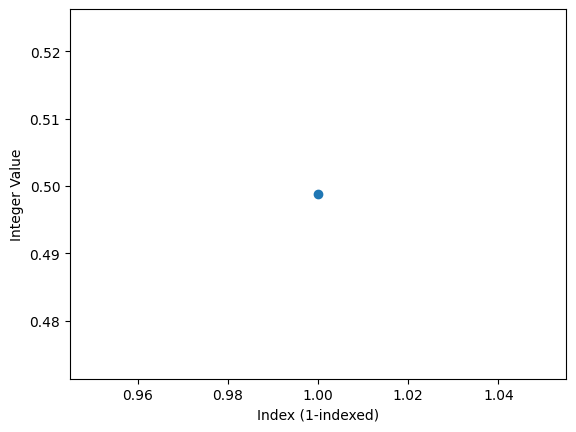

In [2]:
section_tag = 'base' # unique identifier for this variation of notebook parameters
output_dir = '../../data/'

dataset = SensesDataset(
    os.path.join(output_dir, f'{section_tag}_senses.h5'), 
    os.path.join(output_dir, f'{section_tag}_sense_pool.txt'))

segmenter = MultiSentenceFragmentsSegmenter(max_sentences=1, min_tokens=4)
evaluator = SegmentMatcherEvaluator(JaccardScoreSegmenterEvaluator(), only_matched=True)
trial_index = 0
trial = dataset[trial_index]

def plot_integers(int_list):
    # Create the x-axis values (1-indexed positions)
    x_values = [i + 1 for i in range(len(int_list))]
    
    # Create the y-axis values (integers from the list)
    y_values = int_list
    
    # Plot the integers
    plt.plot(x_values, y_values, marker='o')
    
    # Label the axes
    plt.xlabel('Index (1-indexed)')
    plt.ylabel('Integer Value')
    
    # Show the plot
    plt.show()

scores = []
for layer_depth in [10]:#range(1, 25):
    scorer = ContextualizedEmbeddingScorer(model_name='intfloat/e5-large', layer_depth=layer_depth)
    matcher = MaximumScoreMatcher(scorer)
    sequencer = PipelineSequencer(segmenter, matcher)
    result = sequencer(trial['response_transcript'], trial['target_items'])


    typical_result = evaluator(
        trial['response_transcript'], trial['response_units'], result['response_units'], 
        trial['matches'], result['matches'])
    scores.append(typical_result)

plot_integers(scores)